In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
!pip install mlxtend -q
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


In [2]:
data = pd.read_excel('CollectedData.xlsx', sheet_name='Sheet2')
data.head()

,8,1,Unnamed: 2,0,1993,146,Unnamed: 6,2,1.1,Unnamed: 9,...,Unnamed: 70,15.3,7.8,11.55,58,100,79,15.4,8.1,11.7
0,8.0,2.0,NaN,0.0,1993.0,146.0,NaN,2.0,1.0,NaN,...,NaN,15.3,7.8,11.55,58.0,100.0,79.0,15.4,8.1,11.75
1,8.0,3.0,NaN,0.0,1993.0,146.0,NaN,1.0,2.0,NaN,...,NaN,15.3,7.8,11.55,58.0,100.0,79.0,15.5,8.1,11.80
2,8.0,4.0,NaN,0.0,1993.0,146.0,NaN,3.0,1.0,NaN,...,NaN,15.3,7.8,11.55,58.0,100.0,79.0,15.4,8.1,11.75
3,8.0,5.0,NaN,0.0,1993.0,146.0,NaN,3.0,1.0,NaN,...,NaN,15.3,7.8,11.55,58.0,100.0,79.0,15.4,8.1,11.75
4,8.0,6.0,NaN,0.0,1993.0,146.0,NaN,1.0,2.0,NaN,...,NaN,15.3,7.8,11.55,58.0,100.0,79.0,15.6,8.3,11.95


In [3]:
# NAMING THE COLUMNS

In [4]:
df=data.iloc[:,[2,7,18,21,25,26,36,37,39,41,42,43,48,73,76]]
Age=df.iloc[:,0]
AMV=df.iloc[:,1]
Met=df.iloc[:,2]
Clo=df.iloc[:,3]
Dewpt=df.iloc[:,4]
PlaneRadTemp=df.iloc[:,5]
Ta=df.iloc[:,6]
Tmrt=df.iloc[:,7]
Vel=df.iloc[:,8]
AirTurb=df.iloc[:,9]
Pa=df.iloc[:,10]
Rh=df.iloc[:,11]
PMV=df.iloc[:,12]
TaOutdoor=df.iloc[:,13]
RhOutdoor=df.iloc[:,14]
sett = pd.DataFrame(list(zip(Age, AMV, Met, Clo,Dewpt,PlaneRadTemp,Ta,Tmrt,Vel,AirTurb,Pa,Rh,PMV,TaOutdoor,RhOutdoor)), columns=['Age', 'AMV', 'Met', 'Clo','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','PMV','TaOutdoor','RhOutdoor'])
sett


,Age,AMV,Met,Clo,Dewpt,PlaneRadTemp,Ta,Tmrt,Vel,AirTurb,Pa,Rh,PMV,TaOutdoor,RhOutdoor
0,NaN,2.0,2.1,0.78,NaN,NaN,19.100000,19.629472,0.06,NaN,NaN,51.3,0.51,11.55,79.0
1,NaN,1.0,2.1,1.05,NaN,NaN,20.000000,19.046655,0.06,NaN,NaN,51.9,0.80,11.55,79.0
2,NaN,3.0,2.6,0.40,NaN,NaN,21.000000,20.153116,0.06,NaN,NaN,49.9,0.76,11.55,79.0
3,NaN,3.0,3.0,0.37,NaN,NaN,23.000000,21.942458,0.06,NaN,NaN,45.6,1.47,11.55,79.0
4,NaN,1.0,2.1,1.29,NaN,NaN,19.800000,19.429333,0.06,NaN,NaN,51.4,0.97,11.55,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12560,1996.0,1.0,0.1,NaN,22.122,NaN,22.142437,NaN,NaN,67.42325,22.3,22.9,NaN,NaN,0.0
12561,1996.0,1.0,0.1,NaN,22.122,NaN,22.142437,NaN,NaN,67.42325,22.3,21.4,NaN,NaN,0.0
12562,1996.0,1.0,0.1,NaN,22.122,NaN,22.142437,NaN,NaN,67.42325,22.3,23.1,NaN,NaN,0.0
12563,1996.0,1.0,0.1,NaN,22.122,NaN,22.142437,NaN,NaN,67.42325,22.3,22.0,NaN,NaN,0.0


In [5]:
#data types
print("Age",Age.dtypes)
print("AMV",AMV.dtypes)
print("Met",Met.dtypes)
print("Clo",Clo.dtypes)
print("Dewpt",Dewpt.dtypes)
print("PlaneRadTemp",PlaneRadTemp.dtypes)
print("Ta",Ta.dtypes)
print("Tmrt",Tmrt.dtypes)
print("Vel",Vel.dtypes)
print("AirTurb",AirTurb.dtypes)
print("Pa",Pa.dtypes)
print("Rh",Rh.dtypes)
print("PMV",PMV.dtypes)
print("TaOutdoor",TaOutdoor.dtypes)
print("RhOutdoor",RhOutdoor.dtypes)
#no of instances
print("NO. OF INSTANCES IN AGE: ",len(Age)-Age.isnull().sum())
print("NO. OF INSTANCES IN AMV: ",len(AMV)-AMV.isnull().sum())
print("NO. OF INSTANCES IN MET: ",len(Met)-Met.isnull().sum())
print("NO. OF INSTANCES IN CLO: ",len(Clo)-Clo.isnull().sum())
print("NO. OF INSTANCES IN DEWPT: ",len(Dewpt)-Dewpt.isnull().sum())
print("NO. OF INSTANCES IN PLANERADTEMP: ",len(PlaneRadTemp)-PlaneRadTemp.isnull().sum())
print("NO. OF INSTANCES IN TA: ",len(Ta)-Ta.isnull().sum())
print("NO. OF INSTANCES IN TMRT: ",len(Tmrt)-Tmrt.isnull().sum())
print("NO. OF INSTANCES IN VEL: ",len(Vel)-Vel.isnull().sum())
print("NO. OF INSTANCES IN AIRTURB: ",len(AirTurb)-AirTurb.isnull().sum())
print("NO. OF INSTANCES IN PA: ",len(Pa)-Pa.isnull().sum())
print("NO. OF INSTANCES IN RH: ",len(Rh)-Rh.isnull().sum())
print("NO. OF INSTANCES IN PMV: ",len(PMV)-PMV.isnull().sum())
print("NO. OF INSTANCES IN TAOUTDOOR: ",len(TaOutdoor)-TaOutdoor.isnull().sum())
print("NO. OF INSTANCES IN RHOUTDOOR: ",len(RhOutdoor)-RhOutdoor.isnull().sum())
#no of nulls
print("NO. OF NULLS IN AGE: ",Age.isnull().sum())
print("NO. OF NULLS IN AMV: ",AMV.isnull().sum())
print("NO. OF NULLS IN MET: ",Met.isnull().sum())
print("NO. OF NULLS IN CLO: ",Clo.isnull().sum())
print("NO. OF NULLS IN DEWPT: ",Dewpt.isnull().sum())
print("NO. OF NULLS IN PLANERADTEMP: ",PlaneRadTemp.isnull().sum())
print("NO. OF NULLS IN TA: ",Ta.isnull().sum())
print("NO. OF NULLS IN TMRT: ",Tmrt.isnull().sum())
print("NO. OF NULLS IN VEL: ",Vel.isnull().sum())
print("NO. OF NULLS IN AIRTURB: ",AirTurb.isnull().sum())
print("NO. OF NULLS IN PA: ",Pa.isnull().sum())
print("NO. OF NULLS IN RH: ",Rh.isnull().sum())
print("NO. OF NULLS IN PMV: ",PMV.isnull().sum())
print("NO. OF NULLS IN TAOUTDOOR: ",TaOutdoor.isnull().sum())
print("NO. OF NULLS IN RHOUTDOOR: ",RhOutdoor.isnull().sum())
# number of outliers
def outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    i_q_r = q3 - q1
    outliers = df[(df< (q1 - 1.5 * i_q_r)) | (df > (q3 + 1.5 * i_q_r))]
    return outliers
print('Number of outliers in Age column: {}'.format(len(outliers(sett['Age']))))
print('Number of outliers in AMV column: {}'.format(len(outliers(sett['AMV']))))
print('Number of outliers in Met column: {}'.format(len(outliers(sett['Met']))))
print('Number of outliers in Clo column: {}'.format(len(outliers(sett['Clo']))))
print('Number of outliers in Dewpt column: {}'.format(len(outliers(sett['Dewpt']))))
print('Number of outliers in PlaneRadTemp column: {}'.format(len(outliers(sett['PlaneRadTemp']))))
print('Number of outliers in Ta column: {}'.format(len(outliers(sett['Ta']))))
print('Number of outliers in Tmrt column: {}'.format(len(outliers(sett['Tmrt']))))
print('Number of outliers in Vel column: {}'.format(len(outliers(sett['Vel']))))
print('Number of outliers in AirTurb column: {}'.format(len(outliers(sett['AirTurb']))))
print('Number of outliers in Pa column: {}'.format(len(outliers(sett['Pa']))))
print('Number of outliers in Rh column: {}'.format(len(outliers(sett['Rh']))))
print('Number of outliers in PMV column: {}'.format(len(outliers(sett['PMV']))))
print('Number of outliers in TaOutdoor column: {}'.format(len(outliers(sett['TaOutdoor']))))
print('Number of outliers in RhOutdoor column: {}'.format(len(outliers(sett['RhOutdoor']))))

Age float64
AMV float64
Met float64
Clo float64
Dewpt float64
PlaneRadTemp float64
Ta float64
Tmrt float64
Vel float64
AirTurb float64
Pa float64
Rh float64
PMV float64
TaOutdoor float64
RhOutdoor float64
NO. OF INSTANCES IN AGE:  9650
NO. OF INSTANCES IN AMV:  12510
NO. OF INSTANCES IN MET:  10678
NO. OF INSTANCES IN CLO:  11159
NO. OF INSTANCES IN DEWPT:  9014
NO. OF INSTANCES IN PLANERADTEMP:  5544
NO. OF INSTANCES IN TA:  12545
NO. OF INSTANCES IN TMRT:  8864
NO. OF INSTANCES IN VEL:  8865
NO. OF INSTANCES IN AIRTURB:  6965
NO. OF INSTANCES IN PA:  7910
NO. OF INSTANCES IN RH:  12530
NO. OF INSTANCES IN PMV:  11869
NO. OF INSTANCES IN TAOUTDOOR:  11197
NO. OF INSTANCES IN RHOUTDOOR:  12546
NO. OF NULLS IN AGE:  2915
NO. OF NULLS IN AMV:  55
NO. OF NULLS IN MET:  1887
NO. OF NULLS IN CLO:  1406
NO. OF NULLS IN DEWPT:  3551
NO. OF NULLS IN PLANERADTEMP:  7021
NO. OF NULLS IN TA:  20
NO. OF NULLS IN TMRT:  3701
NO. OF NULLS IN VEL:  3700
NO. OF NULLS IN AIRTURB:  5600
NO. OF NULLS IN 

In [6]:
#min
print("min: ")
print("FOR AGE: ",Age.min())
print("FOR AMV: ",AMV.min())
print("FOR MET: ",Met.min())
print("FOR CLO: ",Clo.min())
print("FOR DEWPT: ",Dewpt.min())
print("FOR PLANERADTEMP: ",PlaneRadTemp.min())
print("FOR TA: ",Ta.min())
print("FOR TMRT: ",Tmrt.min())
print("FOR VEL: ",Vel.min())
print("FOR AIRTURB: ",AirTurb.min())
print("FOR PA: ",Pa.min())
print("FOR RH: ",Rh.min())
print("FOR PMV: ",PMV.min())
print("FOR TAOUTDOOR: ",TaOutdoor.min())
print("FOR RHOUTDOOR: ",RhOutdoor.min())
#max
print(" ")
print("max: ")
print("FOR AGE: ",Age.max())
print("FOR AMV: ",AMV.max())
print("FOR MET: ",Met.max())
print("FOR CLO: ",Clo.max())
print("FOR DEWPT: ",Dewpt.max())
print("FOR PLANERADTEMP: ",PlaneRadTemp.max())
print("FOR TA: ",Ta.max())
print("FOR TMRT: ",Tmrt.max())
print("FOR VEL: ",Vel.max())
print("FOR AIRTURB: ",AirTurb.max())
print("FOR PA: ",Pa.max())
print("FOR RH: ",Rh.max())
print("FOR PMV: ",PMV.max())
print("FOR TAOUTDOOR: ",TaOutdoor.max())
print("FOR RHOUTDOOR: ",RhOutdoor.max())
#mode
print(" ")
print("mode: ")
print("FOR AGE: ",Age.mode())
print("FOR AMV: ",AMV.mode())
print("FOR MET: ",Met.mode())
print("FOR CLO: ",Clo.mode())
print("FOR DEWPT: ",Dewpt.mode())
print("FOR PLANERADTEMP: ",PlaneRadTemp.mode())
print("FOR TA: ",Ta.mode())
print("FOR TMRT: ",Tmrt.mode())
print("FOR VEL: ",Vel.mode())
print("FOR AIRTURB: ",AirTurb.mode())
print("FOR PA: ",Pa.mode())
print("FOR RH: ",Rh.mode())
print("FOR PMV: ",PMV.mode())
print("FOR TAOUTDOOR: ",TaOutdoor.mode())
print("FOR RHOUTDOOR: ",RhOutdoor.mode())
#median
print(" ")
print("med: ")
print("FOR AGE: ",Age.median())
print("FOR AMV: ",AMV.median())
print("FOR MET: ",Met.median())
print("FOR CLO: ",Clo.median())
print("FOR DEWPT: ",Dewpt.median())
print("FOR PLANERADTEMP: ",PlaneRadTemp.median())
print("FOR TA: ",Ta.median())
print("FOR TMRT: ",Tmrt.median())
print("FOR VEL: ",Vel.median())
print("FOR AIRTURB: ",AirTurb.median())
print("FOR PA: ",Pa.median())
print("FOR RH: ",Rh.median())
print("FOR PMV: ",PMV.median())
print("FOR TAOUTDOOR: ",TaOutdoor.median())
print("FOR RHOUTDOOR: ",RhOutdoor.median())



min: 
FOR AGE:  0.0
FOR AMV:  -3.0
FOR MET:  0.1
FOR CLO:  0.15
FOR DEWPT:  -1.953
FOR PLANERADTEMP:  -7.42
FOR TA:  15.96
FOR TMRT:  16.61
FOR VEL:  0.0
FOR AIRTURB:  0.0
FOR PA:  0.0
FOR RH:  7.4
FOR PMV:  -4.17
FOR TAOUTDOOR:  -24.9
FOR RHOUTDOOR:  0.0
 
max: 
FOR AGE:  1996.0
FOR AMV:  3.0
FOR MET:  4.5
FOR CLO:  2.13
FOR DEWPT:  26.89675
FOR PLANERADTEMP:  11.7
FOR TA:  31.0
FOR TMRT:  37.445
FOR VEL:  1.88
FOR AIRTURB:  102.45
FOR PA:  27.7
FOR RH:  79.3
FOR PMV:  2.5
FOR TAOUTDOOR:  32.35
FOR RHOUTDOOR:  100.35
 
mode: 
FOR AGE:  0    24.0
Name: Unnamed: 2, dtype: float64
FOR AMV:  0    0.0
Name: 2, dtype: float64
FOR MET:  0    1.0
Name: 2.1, dtype: float64
FOR CLO:  0    0.77
Name: 0.65.1, dtype: float64
FOR DEWPT:  0    17.4
Name: Unnamed: 25, dtype: float64
FOR PLANERADTEMP:  0    0.3
Name: Unnamed: 26, dtype: float64
FOR TA:  0    23.2
Name: 19.1.1, dtype: float64
FOR TMRT:  0    22.5
Name: 19.629471704856712, dtype: float64
FOR VEL:  0    0.1
Name: 0.06.1, dtype: float64
F

In [7]:
#variance

print("var:")
print("FOR AGE: ",Age.var())
print("FOR AMV: ",AMV.var())
print("FOR MET: ",Met.var())
print("FOR CLO: ",Clo.var())
print("FOR DEWPT: ",Dewpt.var())
print("FOR PLANERADTEMP: ",PlaneRadTemp.var())
print("FOR TA: ",Ta.var())
print("FOR TMRT: ",Tmrt.var())
print("FOR VEL: ",Vel.var())
print("FOR AIRTURB: ",AirTurb.var())
print("FOR PA: ",Pa.var())
print("FOR RH: ",Rh.var())
print("FOR PMV: ",PMV.var())
print("FOR TAOUTDOOR: ",TaOutdoor.var())
print("FOR RHOUTDOOR: ",RhOutdoor.var())
#standard deviation
print(" ")
print("std: ")
print("FOR AGE: ",Age.std())
print("FOR AMV: ",AMV.std())
print("FOR MET: ",Met.std())
print("FOR CLO: ",Clo.std())
print("FOR DEWPT: ",Dewpt.std())
print("FOR PLANERADTEMP: ",PlaneRadTemp.std())
print("FOR TA: ",Ta.std())
print("FOR TMRT: ",Tmrt.std())
print("FOR VEL: ",Vel.std())
print("FOR AIRTURB: ",AirTurb.std())
print("FOR PA: ",Pa.std())
print("FOR RH: ",Rh.std())
print("FOR PMV: ",PMV.std())
print("FOR TAOUTDOOR: ",TaOutdoor.std())
print("FOR RHOUTDOOR: ",RhOutdoor.std())


var:
FOR AGE:  462556.55610368383
FOR AMV:  1.2144300695666446
FOR MET:  0.18393941634661357
FOR CLO:  0.04928355928831387
FOR DEWPT:  34.84592820166446
FOR PLANERADTEMP:  1.084022292053154
FOR TA:  2.053443494259767
FOR TMRT:  2.2574746335420053
FOR VEL:  0.006247899088109208
FOR AIRTURB:  627.0571287191916
FOR PA:  66.5225623700926
FOR RH:  226.84801722776646
FOR PMV:  0.28947130007583083
FOR TAOUTDOOR:  113.75106669840022
FOR RHOUTDOOR:  610.3055825825974
 
std: 
FOR AGE:  680.1151050400836
FOR AMV:  1.102011828233547
FOR MET:  0.42888158779156466
FOR CLO:  0.2219990074038933
FOR DEWPT:  5.903043977615655
FOR PLANERADTEMP:  1.041163912193058
FOR TA:  1.4329841221240964
FOR TMRT:  1.5024894786793035
FOR VEL:  0.07904365305392462
FOR AIRTURB:  25.04110877575495
FOR PA:  8.156136485499283
FOR RH:  15.061474603363592
FOR PMV:  0.5380253712194536
FOR TAOUTDOOR:  10.66541451132586
FOR RHOUTDOOR:  24.704363634439105


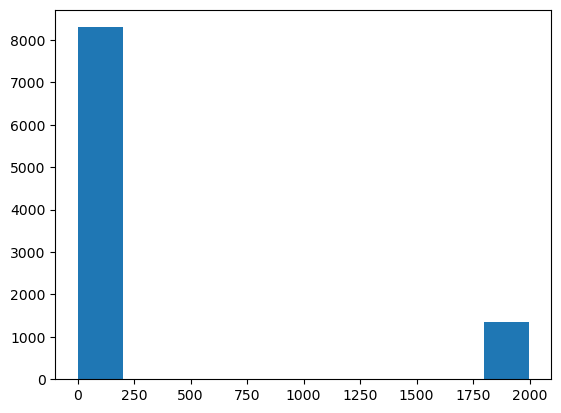

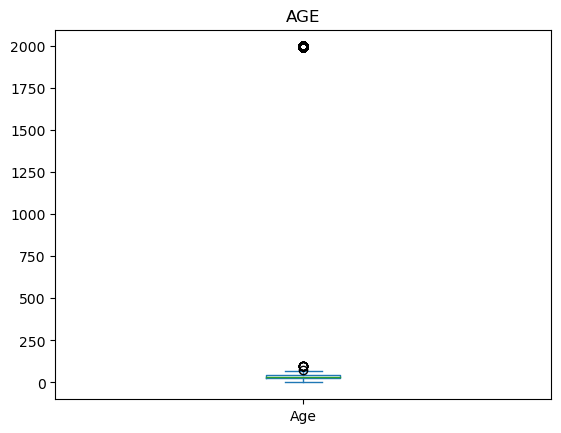

In [8]:
#PAGE 5
#2
plt.hist(Age)
plt.show()
sett['Age'].plot(kind='box', title='AGE')
plt.show()

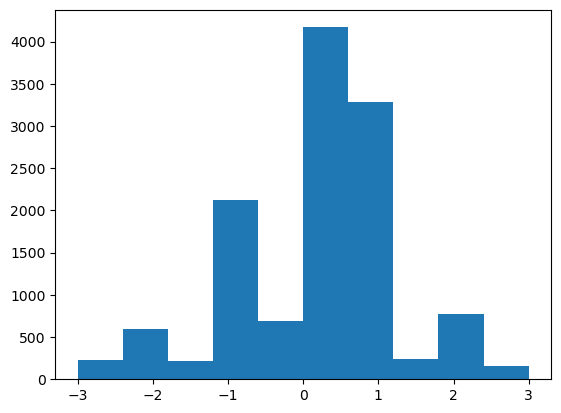

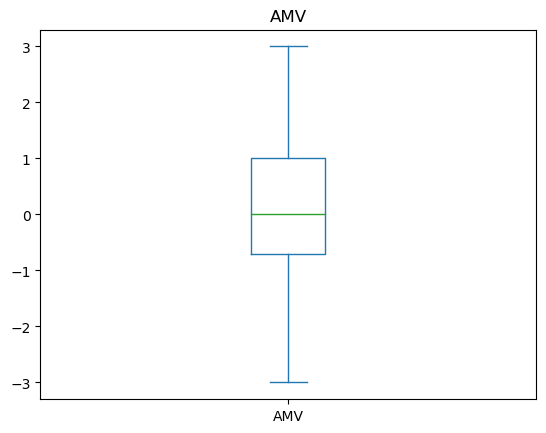

In [9]:
plt.hist(AMV)
plt.show()
sett['AMV'].plot(kind='box', title='AMV')
plt.show()

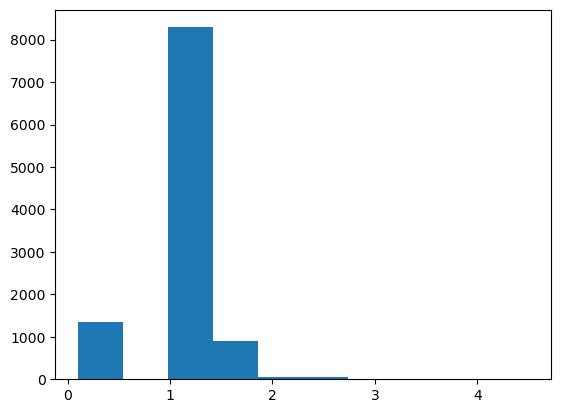

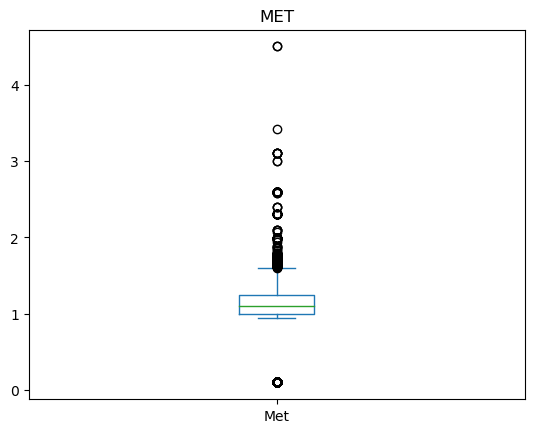

In [10]:
plt.hist(Met)
plt.show()
sett['Met'].plot(kind='box', title='MET')
plt.show()

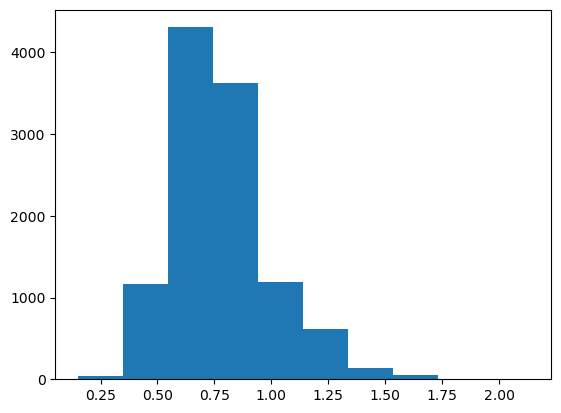

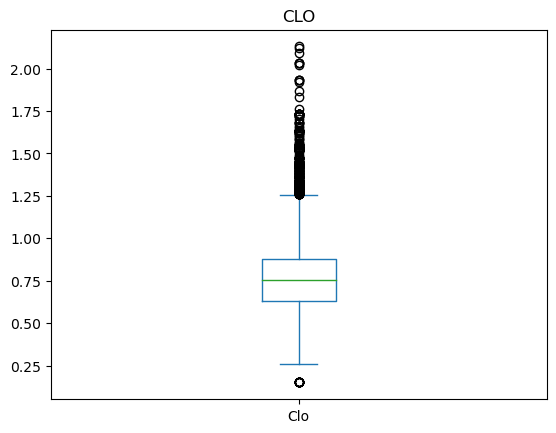

In [11]:
plt.hist(Clo)
plt.show()
sett['Clo'].plot(kind='box', title='CLO')
plt.show()

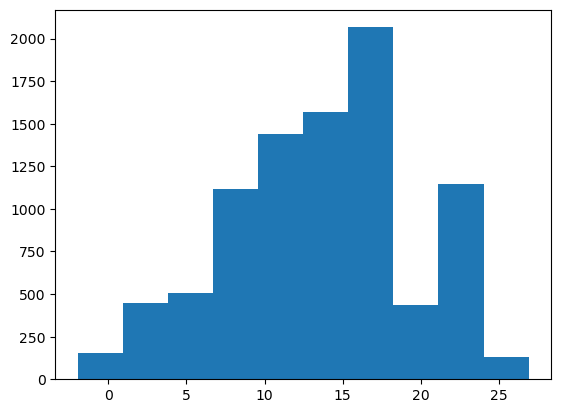

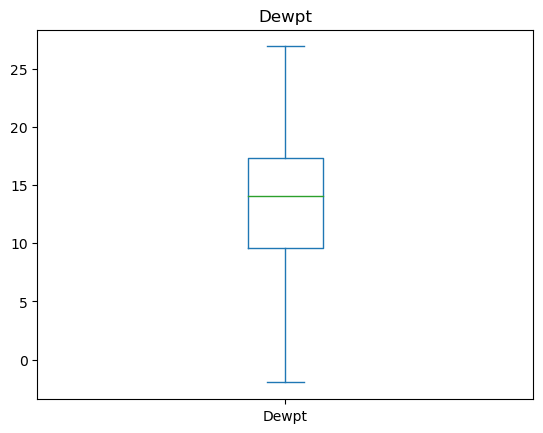

In [12]:
plt.hist(Dewpt)
plt.show()
sett['Dewpt'].plot(kind='box', title='Dewpt')
plt.show()

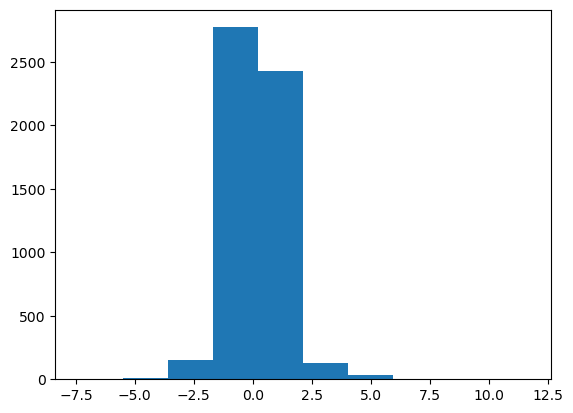

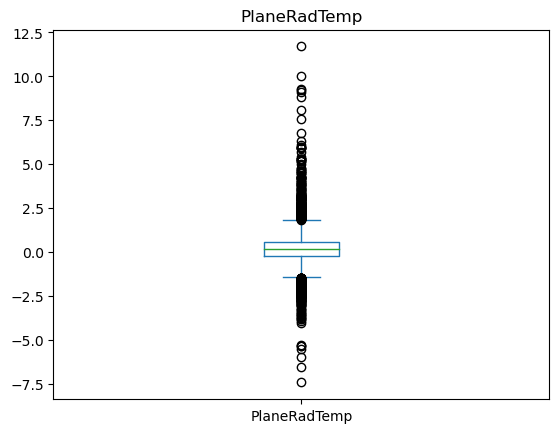

In [13]:
plt.hist(PlaneRadTemp)
plt.show()
sett['PlaneRadTemp'].plot(kind='box', title='PlaneRadTemp')
plt.show()

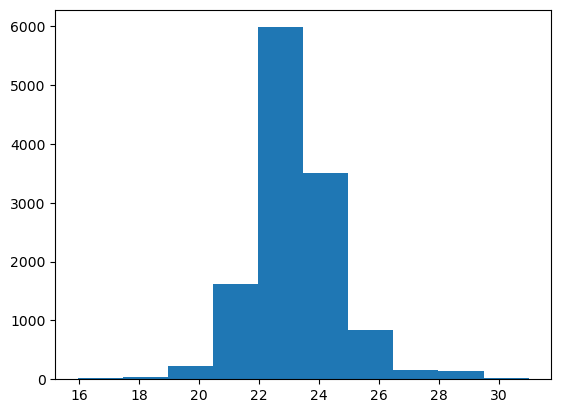

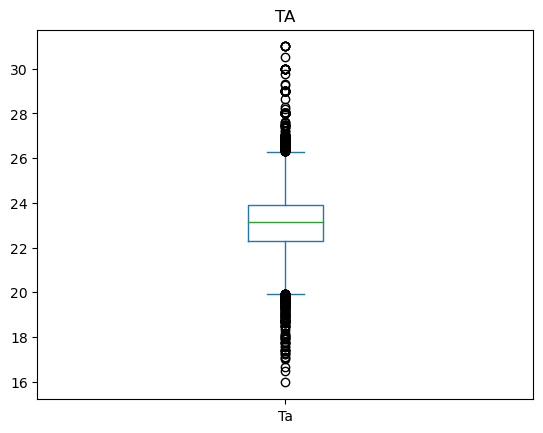

In [14]:
plt.hist(Ta)
plt.show()
sett['Ta'].plot(kind='box', title='TA')
plt.show()

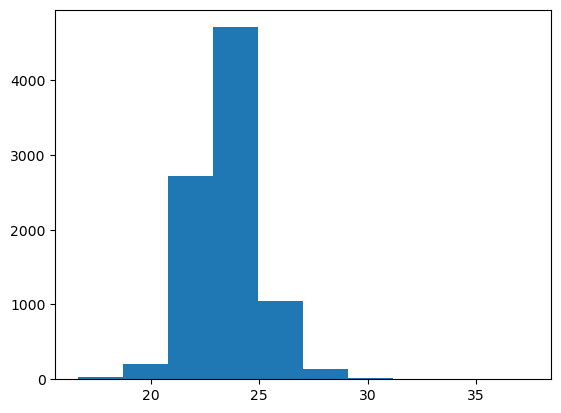

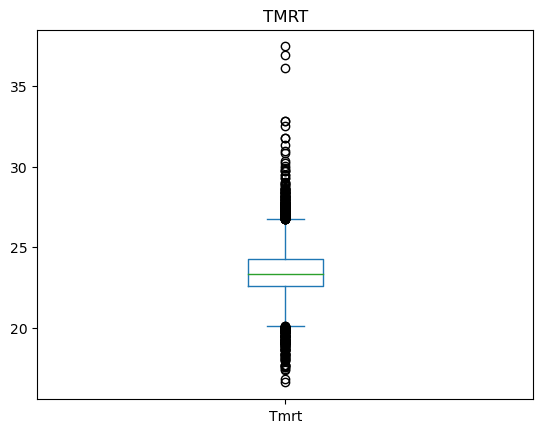

In [15]:
plt.hist(Tmrt)
plt.show()
sett['Tmrt'].plot(kind='box', title='TMRT')
plt.show()

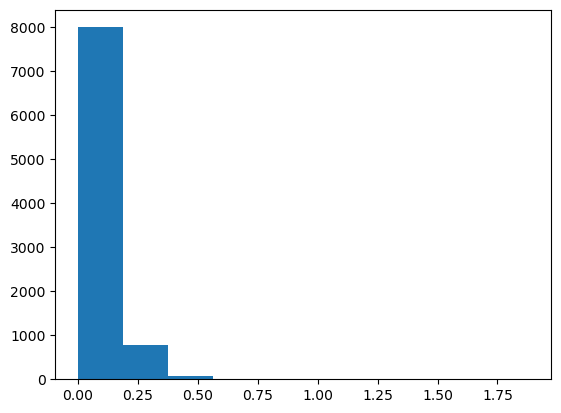

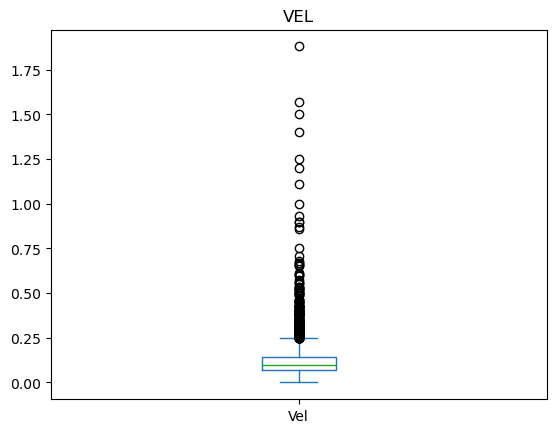

In [16]:
plt.hist(Vel)
plt.show()
sett['Vel'].plot(kind='box', title='VEL')
plt.show()

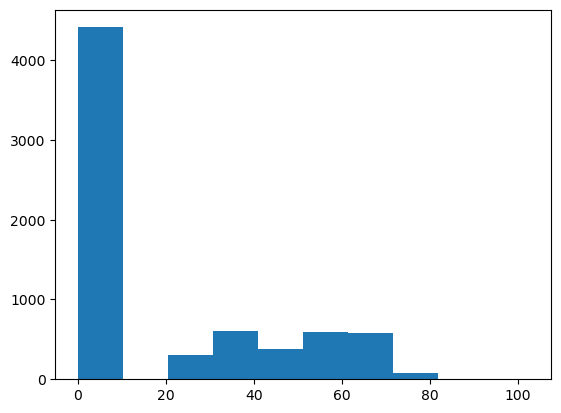

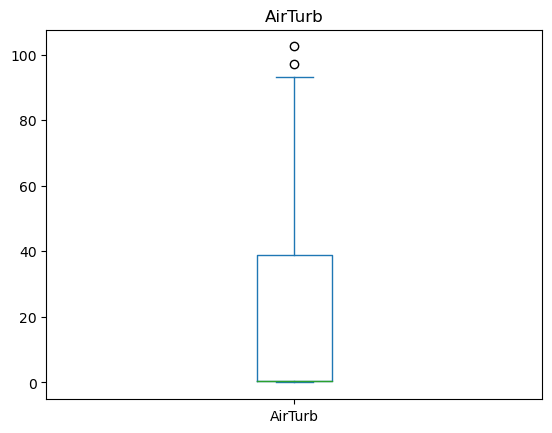

In [17]:
plt.hist(AirTurb)
plt.show()
sett['AirTurb'].plot(kind='box', title='AirTurb')
plt.show()

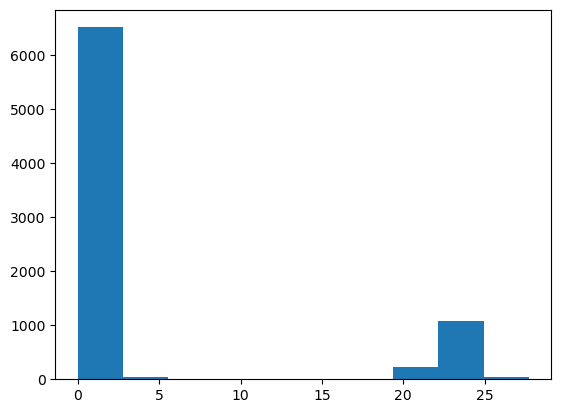

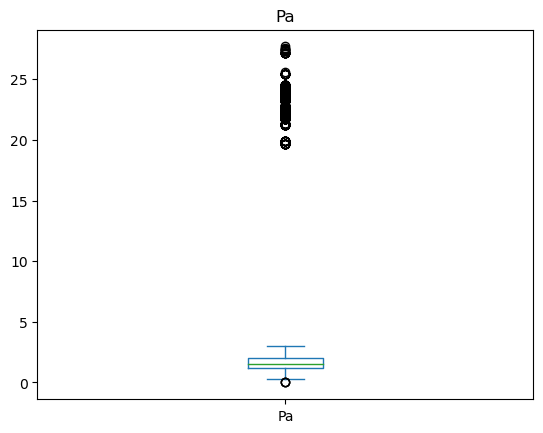

In [18]:
plt.hist(Pa)
plt.show()
sett['Pa'].plot(kind='box', title='Pa')
plt.show()

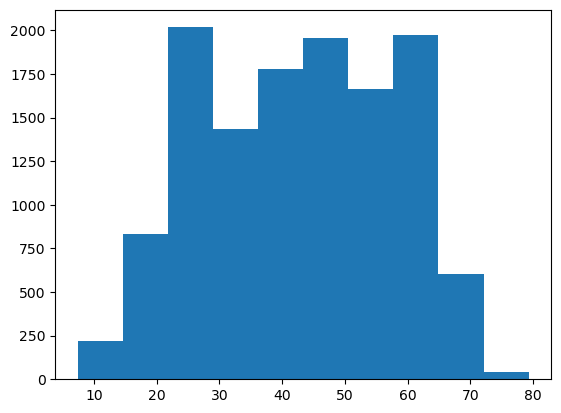

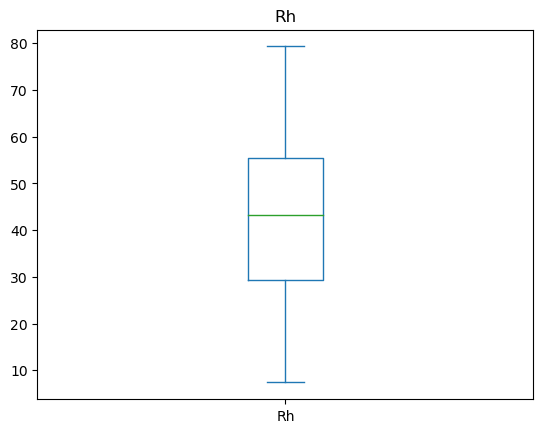

In [19]:
plt.hist(Rh)
plt.show()
sett['Rh'].plot(kind='box', title='Rh')
plt.show()

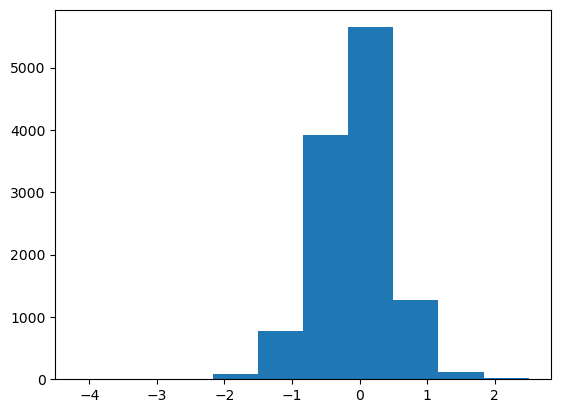

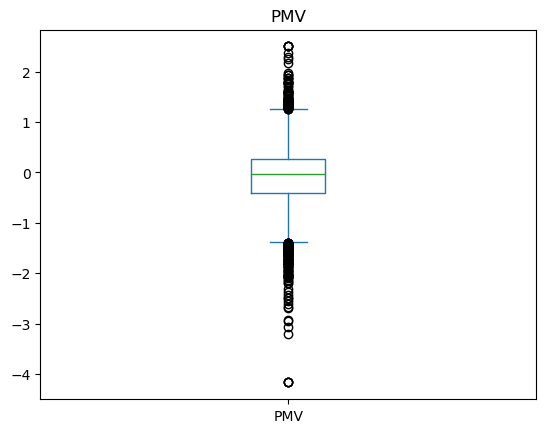

In [20]:
plt.hist(PMV)
plt.show()
sett['PMV'].plot(kind='box', title='PMV')
plt.show()

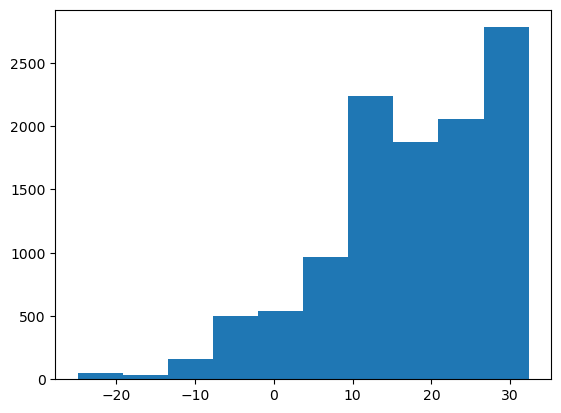

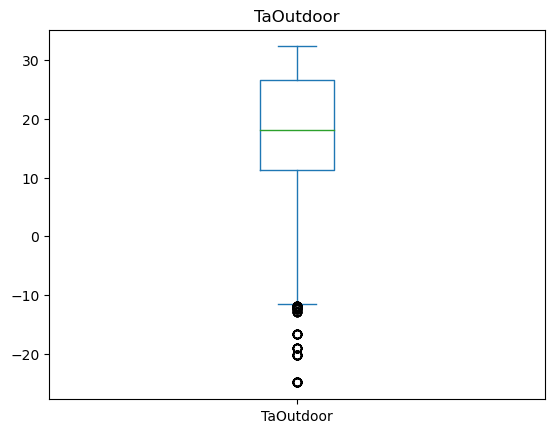

In [21]:
plt.hist(TaOutdoor)
plt.show()
sett['TaOutdoor'].plot(kind='box', title='TaOutdoor')
plt.show()

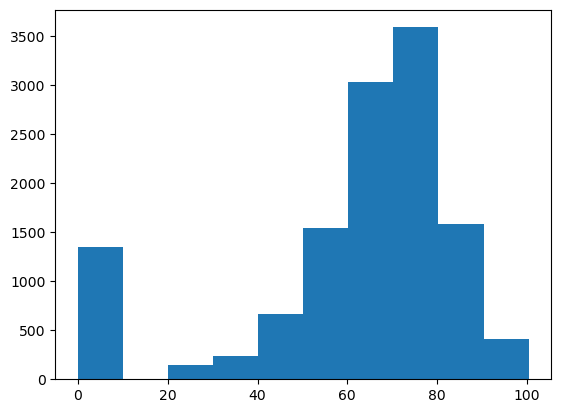

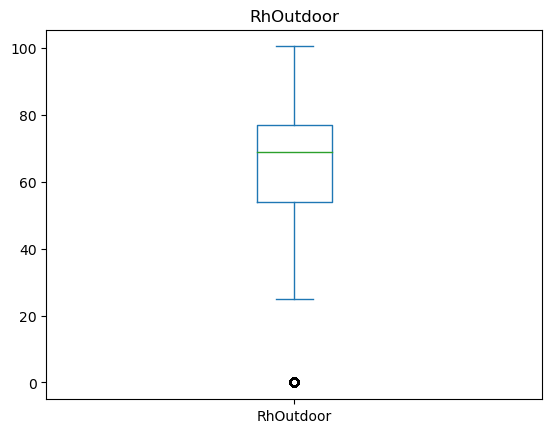

In [22]:
plt.hist(RhOutdoor)
plt.show()
sett['RhOutdoor'].plot(kind='box', title='RhOutdoor')
plt.show()

In [23]:
# fill missing values
Age.fillna(Age.mean(), inplace=True)
AMV.fillna(AMV.mean(), inplace=True)
Met.fillna(Met.mean(), inplace=True)
Clo.fillna(Clo.mean(), inplace=True)
Dewpt.fillna(Dewpt.mean(), inplace=True)
PlaneRadTemp.fillna(PlaneRadTemp.mean(), inplace=True)
Ta.fillna(Ta.mean(), inplace=True)
Tmrt.fillna(Tmrt.mean(), inplace=True)
Vel.fillna(Vel.mean(), inplace=True)
AirTurb.fillna(AirTurb.mean(), inplace=True)
Pa.fillna(Pa.mean(), inplace=True)
Rh.fillna(Rh.mean(), inplace=True)
PMV.fillna(PMV.mean(), inplace=True)
TaOutdoor.fillna(TaOutdoor.mean(), inplace=True)
RhOutdoor.fillna(RhOutdoor.mean(), inplace=True)

In [24]:
# getting preprocessed data
prp_data = pd.DataFrame(list(zip(Age, AMV, Met, Clo,Dewpt,PlaneRadTemp,Ta,Tmrt,Vel,AirTurb,Pa,Rh,PMV,TaOutdoor,RhOutdoor)), columns=['Age', 'AMV', 'Met', 'Clo','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','PMV','TaOutdoor','RhOutdoor'])
prp_data

,Age,AMV,Met,Clo,Dewpt,PlaneRadTemp,Ta,Tmrt,Vel,AirTurb,Pa,Rh,PMV,TaOutdoor,RhOutdoor
0,308.637202,2.0,2.1,0.780000,13.621447,0.217785,19.100000,19.629472,0.060000,18.26587,5.123996,51.3,0.510000,11.550000,79.0
1,308.637202,1.0,2.1,1.050000,13.621447,0.217785,20.000000,19.046655,0.060000,18.26587,5.123996,51.9,0.800000,11.550000,79.0
2,308.637202,3.0,2.6,0.400000,13.621447,0.217785,21.000000,20.153116,0.060000,18.26587,5.123996,49.9,0.760000,11.550000,79.0
3,308.637202,3.0,3.0,0.370000,13.621447,0.217785,23.000000,21.942458,0.060000,18.26587,5.123996,45.6,1.470000,11.550000,79.0
4,308.637202,1.0,2.1,1.290000,13.621447,0.217785,19.800000,19.429333,0.060000,18.26587,5.123996,51.4,0.970000,11.550000,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12560,1996.000000,1.0,0.1,0.778503,22.122000,0.217785,22.142437,23.450693,0.112445,67.42325,22.300000,22.9,-0.073711,17.175087,0.0
12561,1996.000000,1.0,0.1,0.778503,22.122000,0.217785,22.142437,23.450693,0.112445,67.42325,22.300000,21.4,-0.073711,17.175087,0.0
12562,1996.000000,1.0,0.1,0.778503,22.122000,0.217785,22.142437,23.450693,0.112445,67.42325,22.300000,23.1,-0.073711,17.175087,0.0
12563,1996.000000,1.0,0.1,0.778503,22.122000,0.217785,22.142437,23.450693,0.112445,67.42325,22.300000,22.0,-0.073711,17.175087,0.0


In [25]:
#removing outliers

def removing_outliers(d):
     Q1=d.quantile(0.25)
     Q3=d.quantile(0.75)
     IQR=Q3-Q1
     lowerlimit=Q1-1.5*IQR
     upperlimit=Q3+1.5*IQR
     return d[(d>lowerlimit)&(d<upperlimit)]


Age=removing_outliers(Age)
AMV1=removing_outliers(AMV)
Met=removing_outliers(Met)
Clo=removing_outliers(Clo)
Dewpt=removing_outliers(Dewpt)
PlaneRadTemp=removing_outliers(PlaneRadTemp)
Ta=removing_outliers(Ta)
Tmrt=removing_outliers(Tmrt)
Vel=removing_outliers(Vel)
AirTurb=removing_outliers(AirTurb)
Pa=removing_outliers(Pa)
Rh=removing_outliers(Rh)
PMV=removing_outliers(PMV)
TaOutdoor=removing_outliers(TaOutdoor)
RhOutdoor=removing_outliers(RhOutdoor)

<AxesSubplot:>

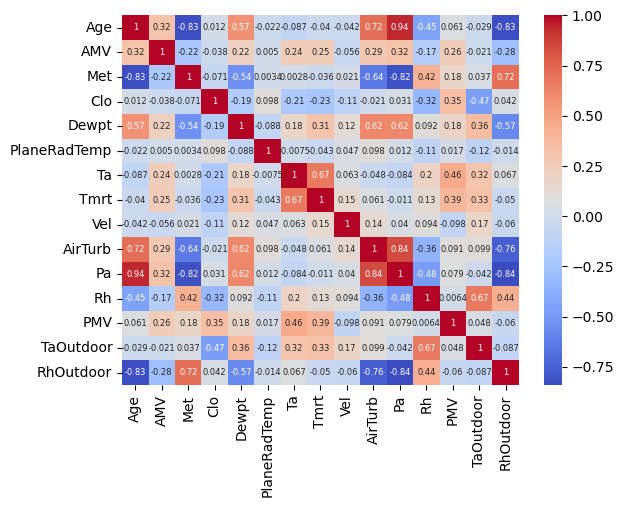

In [26]:
#PAGE 9
#6A
sns.heatmap(prp_data.corr(), cmap="coolwarm", annot=True, annot_kws={'size': 6})


In [27]:
def calculate_entropy(df):
    prob = df.value_counts(normalize = True)
    entropy = -1 * np.sum(np.log2(prob) * prob)
    return round(entropy, 3)
print('Entropy of Age Column: {}'.format(calculate_entropy(prp_data['Age'])))   
print('Entropy of AMV column: {}'.format(calculate_entropy(prp_data['AMV'])))
print('NEntropy of Met column: {}'.format(calculate_entropy(prp_data['Met'])))
print('Entropy of Clo column: {}'.format(calculate_entropy(prp_data['Clo'])))
print('Entropy of Dewpt column: {}'.format(calculate_entropy(prp_data['Dewpt'])))
print('Entropy of PlaneRadTemp column: {}'.format(calculate_entropy(prp_data['PlaneRadTemp'])))
print('Entropy of Ta column: {}'.format(calculate_entropy(prp_data['Ta'])))
print('Entropy of Tmrt column: {}'.format(calculate_entropy(prp_data['Tmrt'])))
print('Entropy of Vel column: {}'.format(calculate_entropy(prp_data['Vel'])))
print('Entropy of AirTurb column: {}'.format(calculate_entropy(prp_data['AirTurb'])))
print('Entropy of Pa column: {}'.format(calculate_entropy(prp_data['Pa'])))
print('Entropy of Rh column: {}'.format(calculate_entropy(prp_data['Rh'])))
print('Entropy of PMV column: {}'.format(calculate_entropy(prp_data['PMV'])))
print('Entropy of TaOutdoor column: {}'.format(calculate_entropy(prp_data['TaOutdoor'])))
print('Entropy of RhOutdoor column: {}'.format(calculate_entropy(prp_data['RhOutdoor'])))

print("\n")
print("INFORMATION GAIN: ")
print("\n")

def calculate_IG(df, target, feature):
    target_entropy = calculate_entropy(df[target])
    entropy_list = []
    weight_list = []
    for i in df[feature].unique():
        feature_level = df[df[feature] == i]
        entropy_level = calculate_entropy(feature_level[target])
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(feature_level) / len(df)
        weight_list.append(round(weight_level, 3))
    remaining_entropy = np.sum(np.array(entropy_list) * np.array(weight_list))
    information_gain = target_entropy - remaining_entropy
    return information_gain

prp_data['AMV'] = prp_data['AMV'].astype(int)
for i in prp_data.drop(columns = 'AMV').columns:
    info_gain = calculate_IG(prp_data, 'AMV', i)
    print(i)
    print(round(info_gain, 3))    

Entropy of Age Column: 4.496
Entropy of AMV column: 3.506
NEntropy of Met column: 5.197
Entropy of Clo column: 7.425
Entropy of Dewpt column: 7.855
Entropy of PlaneRadTemp column: 5.169
Entropy of Ta column: 8.286
Entropy of Tmrt column: 8.203
Entropy of Vel column: 5.58
Entropy of AirTurb column: 6.402
Entropy of Pa column: 7.352
Entropy of Rh column: 10.879
Entropy of PMV column: 7.566
Entropy of TaOutdoor column: 7.652
Entropy of RhOutdoor column: 7.204


INFORMATION GAIN: 


Age
0.248
Met
0.338
Clo
0.392
Dewpt
0.79
PlaneRadTemp
0.466
Ta
0.623
Tmrt
0.773
Vel
0.337
AirTurb
0.763
Pa
0.98
Rh
1.186
PMV
0.309
TaOutdoor
0.434
RhOutdoor
0.389


In [28]:
#normlization
X = prp_data[['Age', 'Met', 'Clo','Vel', 'AirTurb', 'Pa', 'Rh', 'TaOutdoor', 'RhOutdoor']]
y = prp_data.drop(X, axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)
scaler = MinMaxScaler()
scaler.fit_transform(X_train)
scaler.fit_transform(X_test)

array([[0.01202405, 0.35346985, 0.2458427 , ..., 0.6528828 , 0.89606987,
        0.64889659],
       [0.02254509, 0.32196884, 0.56179775, ..., 0.34033051, 0.44279476,
        0.70453413],
       [0.02955912, 0.36666667, 0.88764045, ..., 0.49273939, 0.79388646,
        0.61783757],
       ...,
       [0.02254509, 0.32196884, 0.4494382 , ..., 0.1361322 , 0.57117904,
        0.56851021],
       [0.02755511, 0.32196884, 0.59550562, ..., 0.35660718, 0.4349345 ,
        0.7513702 ],
       [0.01553106, 0.35062571, 0.23969663, ..., 0.52486114, 0.82183406,
        0.53833764]])

In [29]:
# X=prp_data.iloc[:,0]
# X=prp_data.iloc[:,2:12]
# X['Age']=prp_data.iloc[:,0]
# X['TaOutdoor']=prp_data.iloc[:,13:14]
# X['RhOutdoor']=prp_data.iloc[:,14:15]
# Y=prp_data.iloc[:,12:13]    #PMV
# X_train,Y_train,x_test,y_test=train_test_split(X,Y,test_size=0.3,random_state=100)

# p_x = prp_data[['Age', 'Vel', 'AirTurb', 'Pa', 'Rh', 'TaOutdoor', 'RhOutdoor']]
# p_y = prp_data.PMV
#forward selection PMV linear regression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression as LGR
prp_data['AMV']=pd.cut(prp_data['AMV'],bins=[-10,-2.5,-1.5,-0.5,0.5,1.5,2.5,10],labels=[-3,-2,-1,0,1,2,3])
print(prp_data['AMV'])
X=prp_data[['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor']]
Y=prp_data['AMV']
#print👍
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20,random_state=None)
sfs1 = sfs(LGR(),k_features='best', forward=False,floating=False,cv=0)
sfs1 = sfs1.fit(X_train, y_train)
#feat_names = list(sfs1.k_feature_names_)
sfs1.subsets_
#print(feat_names)

      

0        2
1        1
2        3
3        3
4        1
        ..
12560    1
12561    1
12562    1
12563    1
12564    1
Name: AMV, Length: 12565, dtype: category
Categories (7, int64): [-3 < -2 < -1 < 0 < 1 < 2 < 3]


C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

{13: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.52118981]),
  'avg_score': 0.5211898129725427,
  'feature_names': ('Age',
   'Clo',
   'Met',
   'Dewpt',
   'PlaneRadTemp',
   'Ta',
   'Tmrt',
   'Vel',
   'AirTurb',
   'Pa',
   'Rh',
   'TaOutdoor',
   'RhOutdoor')},
 12: {'feature_idx': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.52188619]),
  'avg_score': 0.5218861918026263,
  'feature_names': ('Clo',
   'Met',
   'Dewpt',
   'PlaneRadTemp',
   'Ta',
   'Tmrt',
   'Vel',
   'AirTurb',
   'Pa',
   'Rh',
   'TaOutdoor',
   'RhOutdoor')},
 11: {'feature_idx': (1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.52148826]),
  'avg_score': 0.5214882610425786,
  'feature_names': ('Clo',
   'Met',
   'Dewpt',
   'Ta',
   'Tmrt',
   'Vel',
   'AirTurb',
   'Pa',
   'Rh',
   'TaOutdoor',
   'RhOutdoor')},
 10: {'feature_idx': (1, 2, 3, 5, 6, 8, 9, 10, 11, 12),
  'cv_scores': array([0.52168723]),
  'avg_score': 0.521687226

In [31]:
#backward selection PMV linear regression
prp_data['AMV']=pd.cut(prp_data['AMV'],bins=[-10,-2.5,-1.5,-0.5,0.5,1.5,2.5,10],labels=[-3,-2,-1,0,1,2,3])
print(prp_data['AMV'])
X=prp_data[['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor']]
Y=prp_data['AMV']
#print(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20,random_state=None)
sfs1 = sfs(LGR(),k_features='best', forward=False,floating=False,cv=0)
sfs1 = sfs1.fit(X_train, y_train)
#feat_names = list(sfs1.k_feature_names_)
sfs1.subsets_
#print(feat_names)

0        2
1        1
2        3
3        3
4        1
        ..
12560    1
12561    1
12562    1
12563    1
12564    1
Name: AMV, Length: 12565, dtype: category
Categories (7, int64): [-3 < -2 < -1 < 0 < 1 < 2 < 3]


C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

{13: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.52745722]),
  'avg_score': 0.5274572224432948,
  'feature_names': ('Age',
   'Clo',
   'Met',
   'Dewpt',
   'PlaneRadTemp',
   'Ta',
   'Tmrt',
   'Vel',
   'AirTurb',
   'Pa',
   'Rh',
   'TaOutdoor',
   'RhOutdoor')},
 12: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11),
  'cv_scores': array([0.52765619]),
  'avg_score': 0.5276561878233187,
  'feature_names': ('Age',
   'Clo',
   'Met',
   'Dewpt',
   'PlaneRadTemp',
   'Ta',
   'Tmrt',
   'Vel',
   'AirTurb',
   'Pa',
   'Rh',
   'TaOutdoor')},
 11: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10),
  'cv_scores': array([0.52765619]),
  'avg_score': 0.5276561878233187,
  'feature_names': ('Age',
   'Clo',
   'Met',
   'Dewpt',
   'PlaneRadTemp',
   'Ta',
   'Tmrt',
   'Vel',
   'AirTurb',
   'Pa',
   'Rh')},
 10: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 10),
  'cv_scores': array([0.52765619]),
  'avg_score': 0.5276561878233187,
  'fe

In [32]:
#forward selection AMV logistic regression
prp_data['AMV']=pd.cut(prp_data['AMV'],bins=[-10,-2.5,-1.5,-0.5,0.5,1.5,2.5,10],labels=[-3,-2,-1,0,1,2,3])
print(prp_data['AMV'])
X=prp_data[['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor']]
Y=prp_data['AMV']
#print(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20,random_state=None)
sfs1 = sfs(LGR(),k_features='best', forward=False,floating=False,cv=0)
sfs1 = sfs1.fit(X_train, y_train)
feat_names = list(sfs1.k_feature_names_)
#sfs1.subsets_
print(feat_names)

0        2
1        1
2        3
3        3
4        1
        ..
12560    1
12561    1
12562    1
12563    1
12564    1
Name: AMV, Length: 12565, dtype: category
Categories (7, int64): [-3 < -2 < -1 < 0 < 1 < 2 < 3]


C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

['Age', 'Clo', 'Met', 'Dewpt', 'Ta', 'Tmrt', 'AirTurb', 'Rh', 'RhOutdoor']


C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
from sklearn.linear_model import LinearRegression

#backward selection AMV logistic regression
X=prp_data[['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor']]
Y=prp_data['PMV']
#X=preprocessing.normalize(X)
#Y=preprocessing.normalize(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)
X.shape,Y.shape
lreg = LinearRegression()
sfs1 = sfs(lreg,k_features=1, forward=False, verbose=2)
sfs1 = sfs1.fit(X_train, y_train)
feat_names = list(sfs1.k_feature_names_)
print(feat_names)
sfs1.subsets_


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.6s finished

[2022-12-05 15:17:29] Features: 12/1 -- score: 0.8357654486509458[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.5s finished

[2022-12-05 15:17:29] Features: 11/1 -- score: 0.8357164381268818[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.4s finished

[2022-12-05 15:17:30] Features: 10/1 -- score: 0.8352930526905249[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

['Ta']


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2022-12-05 15:17:32] Features: 2/1 -- score: 0.4136184637239313[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2022-12-05 15:17:32] Features: 1/1 -- score: 0.20303886856744677

{13: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.83574768, 0.8298368 , 0.82968944, 0.83796561, 0.84551461]),
  'avg_score': 0.8357508282040499,
  'feature_names': ('Age',
   'Clo',
   'Met',
   'Dewpt',
   'PlaneRadTemp',
   'Ta',
   'Tmrt',
   'Vel',
   'AirTurb',
   'Pa',
   'Rh',
   'TaOutdoor',
   'RhOutdoor')},
 12: {'feature_idx': (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.83591413, 0.82979576, 0.82968275, 0.8379577 , 0.8454769 ]),
  'avg_score': 0.8357654486509458,
  'feature_names': ('Age',
   'Clo',
   'Met',
   'Dewpt',
   'Ta',
   'Tmrt',
   'Vel',
   'AirTurb',
   'Pa',
   'Rh',
   'TaOutdoor',
   'RhOutdoor')},
 11: {'feature_idx': (0, 1, 2, 3, 5, 6, 7, 8, 9, 11, 12),
  'cv_scores': array([0.83586893, 0.82980719, 0.82953097, 0.83800252, 0.84537256]),
  'avg_score': 0.8357164381268818,
  'feature_names': ('Age',
   'Clo',
   'Met',
   'Dewpt',
   'Ta',
   'Tmrt',
   'Vel',
   'AirTurb',
   'Pa',
   'TaOutdoor',
 

In [36]:
kf = KFold(n_splits = 3, shuffle = True, random_state = 101)
cross_val_score(lreg, X_train, y_train)
kf = KFold(n_splits = 3, shuffle = True, random_state = 101)
cross_val_score(logreg_, X_train_abs, y_train_abs)
confusion_matrix(y_test_abs, X_test_abs)

NameError: name 'lreg_' is not defined